In [139]:
import json
import pandas as pd


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Lasso, Ridge

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [140]:
df = pd.read_json('./Data/matches.jsonl',lines=True,orient='columns')

In [141]:
df.shape

(9130, 15)

In [126]:
#df1 = pd.get_dummies(df['league'], drop_first=True)
#df1 = pd.get_dummies(df['round'], drop_first=True)
#df1 = pd.get_dummies(df['season'], drop_first=True)
df1 = pd.get_dummies(df['score'], drop_first=True)

In [127]:
df1.shape

(9130, 10)

In [128]:
df1.head()

,1,2,3,4,5,6,7,8,9,10
0,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [129]:
df = pd.concat([df, df1], axis='columns')

In [130]:
df.head()

,match_id,date,home_team,away_team,home_score,away_score,home_starting_players,home_sub_players,home_events,away_starting_players,...,1,2,3,4,5,6,7,8,9,10
0,5700,2017-08-18,Bayern,Leverkusen,3,1,"[4710, 2376, 4588, 5627, 1567, 2954, 57, 660, ...","[6388, 5333, 401, 1836, 5085, 1939, 4162]","[{'minute': 9, 'period': 'first_half', 'player...","[3991, 1639, 6211, 4128, 4383, 2198, 2776, 375...",...,0,0,0,1,0,0,0,0,0,0
1,5701,2017-08-19,Mainz 05,Hannover,0,1,"[381, 4331, 1648, 4236, 2348, 2115, 4965, 581,...","[6273, 1125, 1912, 3581, 2412, 3922, 6571]","[{'minute': 41, 'period': 'first_half', 'playe...","[308, 2164, 5844, 4041, 3282, 4562, 3168, 5410...",...,1,0,0,0,0,0,0,0,0,0
2,5702,2017-08-19,Amburgo,Augsburg,1,0,"[1321, 6654, 5719, 4006, 3773, 4661, 4646, 102...","[863, 3069, 2545, 4483, 780, 5758, 5079]","[{'minute': 8, 'period': 'first_half', 'player...","[119, 4521, 631, 204, 4772, 2340, 5603, 3828, ...",...,1,0,0,0,0,0,0,0,0,0
3,5703,2017-08-19,Hertha Berlin,Stoccarda,2,0,"[3020, 2911, 6224, 5194, 5391, 3707, 3065, 158...","[2582, 624, 2379, 3873, 2456, 2429, 2280]","[{'minute': 46, 'period': 'second_half', 'play...","[6274, 4427, 1158, 1767, 5310, 1395, 2212, 527...",...,0,1,0,0,0,0,0,0,0,0
4,5704,2017-08-19,Hoffenheim,Werder B.,1,0,"[4950, 5474, 4694, 71, 4831, 1049, 5117, 5131,...","[6386, 5012, 3198, 1664, 1527, 1375, 2122]","[{'minute': 63, 'period': 'second_half', 'play...","[4605, 4452, 2010, 44, 1645, 5687, 5006, 504, ...",...,1,0,0,0,0,0,0,0,0,0


In [132]:
#df.drop(['league', 'season', 'round'], axis = 1, inplace=True)
df.drop(['score'], axis = 1, inplace=True)

In [142]:
# creating new score columns 
df['score'] = df['home_score'] + df['away_score']

# I want to create one for each half
#df['1h_score'] = df['home_events'isOwnGoal-first half] + df['away_events'isOwnGoal-first half]
#df['2h_score'] = df['home_events'isOwnGoal-first half] + df['away_events'isOwnGoal-first half]

In [121]:
df.head()

,match_id,date,home_team,away_team,home_score,away_score,home_starting_players,home_sub_players,home_events,away_starting_players,...,33,34,35,36,37,38,20182019,20192020,20202021,20212022
0,5700,2017-08-18,Bayern,Leverkusen,3,1,"[4710, 2376, 4588, 5627, 1567, 2954, 57, 660, ...","[6388, 5333, 401, 1836, 5085, 1939, 4162]","[{'minute': 9, 'period': 'first_half', 'player...","[3991, 1639, 6211, 4128, 4383, 2198, 2776, 375...",...,0,0,0,0,0,0,0,0,0,0
1,5701,2017-08-19,Mainz 05,Hannover,0,1,"[381, 4331, 1648, 4236, 2348, 2115, 4965, 581,...","[6273, 1125, 1912, 3581, 2412, 3922, 6571]","[{'minute': 41, 'period': 'first_half', 'playe...","[308, 2164, 5844, 4041, 3282, 4562, 3168, 5410...",...,0,0,0,0,0,0,0,0,0,0
2,5702,2017-08-19,Amburgo,Augsburg,1,0,"[1321, 6654, 5719, 4006, 3773, 4661, 4646, 102...","[863, 3069, 2545, 4483, 780, 5758, 5079]","[{'minute': 8, 'period': 'first_half', 'player...","[119, 4521, 631, 204, 4772, 2340, 5603, 3828, ...",...,0,0,0,0,0,0,0,0,0,0
3,5703,2017-08-19,Hertha Berlin,Stoccarda,2,0,"[3020, 2911, 6224, 5194, 5391, 3707, 3065, 158...","[2582, 624, 2379, 3873, 2456, 2429, 2280]","[{'minute': 46, 'period': 'second_half', 'play...","[6274, 4427, 1158, 1767, 5310, 1395, 2212, 527...",...,0,0,0,0,0,0,0,0,0,0
4,5704,2017-08-19,Hoffenheim,Werder B.,1,0,"[4950, 5474, 4694, 71, 4831, 1049, 5117, 5131,...","[6386, 5012, 3198, 1664, 1527, 1375, 2122]","[{'minute': 63, 'period': 'second_half', 'play...","[4605, 4452, 2010, 44, 1645, 5687, 5006, 504, ...",...,0,0,0,0,0,0,0,0,0,0


In [138]:
df.shape

(9130, 67)

In [101]:
df['round'].value_counts(normalize=False)

1     245
27    245
21    245
22    245
23    245
24    245
25    245
26    245
28    245
19    245
29    245
30    245
31    245
32    245
33    245
34    245
2     245
20    245
18    245
9     245
3     245
4     245
5     245
6     245
7     245
17    245
8     245
10    245
11    245
12    245
13    245
14    245
15    245
16    245
35    200
36    200
37    200
38    200
Name: round, dtype: int64

In [85]:
df['league'].value_counts(normalize=False)

en    1900
es    1900
fr    1900
it    1900
de    1530
Name: league, dtype: int64

In [145]:
df['score'].value_counts(normalize=True)

2     0.238445
3     0.220372
1     0.162212
4     0.151588
5     0.086637
0     0.079080
6     0.038226
7     0.016758
8     0.005038
9     0.001533
10    0.000110
Name: score, dtype: float64

In [147]:
df.groupby('league')['score'].mean()

league
de    3.066667
en    2.746842
es    2.554211
fr    2.539474
it    2.864211
Name: score, dtype: float64

In [148]:
df.groupby('league')['score'].median()

league
de    3.0
en    3.0
es    2.0
fr    2.0
it    3.0
Name: score, dtype: float64

In [151]:
df.groupby('league')['score'].value_counts(normalize=True).unstack()

score,0,1,2,3,4,5,6,7,8,9,10
league,,,,,,,,,,,
de,0.054902,0.116340,0.235294,0.217647,0.182353,0.104575,0.056863,0.024183,0.006536,0.001307,NaN
en,0.066842,0.164737,0.246842,0.224737,0.151579,0.093158,0.031579,0.014737,0.002632,0.003158,NaN
es,0.085263,0.194737,0.256842,0.210526,0.132632,0.067895,0.031053,0.013158,0.005789,0.001579,0.000526
fr,0.118421,0.173684,0.229474,0.205789,0.145263,0.078947,0.031579,0.011579,0.004211,0.001053,NaN
it,0.065263,0.152632,0.223158,0.242632,0.152105,0.092105,0.043684,0.021579,0.006316,0.000526,NaN


In [80]:
# 14.81% of games are 5 goals or over

In [81]:
# I want to see percentages by league

### I want to create:
#### - Goal Acceleration/Speed: some type of measurement of how short of time is between goals
#### - Running count of goals by players and then that team would have a score based on starting players running goals tailie
#### - Team rating based on players
#### - Over Historic Values: 1h/2h/G. 
#### - Classification of to over or not over coupled with a bet rating 1/4. Ex. NB, YB1, YB2, YB3, YB4
#### - Current standings
#### - Game # of season
#### - Team Rating based on over likelyhood
#### - Goals For vs Goals Against

In [83]:
df.iloc[0,11]

[{'minute': 9, 'period': 'first_half', 'player': 660, 'type': 'assist'},
 {'isOwnGoal': False,
  'isPenalty': False,
  'minute': 9,
  'period': 'first_half',
  'player': 5627,
  'type': 'goal'},
 {'minute': 18, 'period': 'first_half', 'player': 57, 'type': 'assist'},
 {'isOwnGoal': False,
  'isPenalty': False,
  'minute': 18,
  'period': 'first_half',
  'player': 2954,
  'type': 'goal'},
 {'isOwnGoal': False,
  'isPenalty': True,
  'minute': 52,
  'period': 'second_half',
  'player': 3894,
  'type': 'goal'},
 {'minute': 60, 'period': 'second_half', 'player': 1836, 'type': 'subIn'},
 {'minute': 60, 'period': 'second_half', 'player': 3643, 'type': 'subOff'},
 {'minute': 61, 'period': 'second_half', 'player': 5333, 'type': 'subIn'},
 {'minute': 61, 'period': 'second_half', 'player': 2376, 'type': 'subOff'},
 {'minute': 63, 'period': 'second_half', 'player': 57, 'type': 'yellowCard'},
 {'minute': 76, 'period': 'second_half', 'player': 5085, 'type': 'subIn'},
 {'minute': 76, 'period': 'seco

In [122]:
df.describe()


,match_id,home_score,away_score,en,es,fr,it,score,2,3,...,33,34,35,36,37,38,20182019,20192020,20202021,20212022
count,9130.000000,9130.000000,9130.000000,9130.000000,9130.000000,9130.000000,9130.000000,9130.000000,9130.000000,9130.000000,...,9130.000000,9130.000000,9130.000000,9130.000000,9130.000000,9130.000000,9130.000000,9130.000000,9130.000000,9130.000000
mean,4564.500000,1.511610,1.230011,0.208105,0.208105,0.208105,0.208105,2.741621,0.026835,0.026835,...,0.026835,0.026835,0.021906,0.021906,0.021906,0.021906,0.200000,0.200000,0.200000,0.200000
std,2635.748312,1.304427,1.177759,0.405975,0.405975,0.405975,0.405975,1.682079,0.161609,0.161609,...,0.161609,0.161609,0.146384,0.146384,0.146384,0.146384,0.400022,0.400022,0.400022,0.400022
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2282.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4564.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6846.750000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9129.000000,9.000000,9.000000,1.000000,1.000000,1.000000,1.000000,10.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 

In [133]:
df.shape

(9130, 67)

In [134]:
df.isna().sum()

match_id      0
date          0
home_team     0
away_team     0
home_score    0
             ..
6             0
7             0
8             0
9             0
10            0
Length: 67, dtype: int64

In [105]:
df.tail()

,match_id,league,season,round,date,home_team,away_team,home_score,away_score,home_starting_players,home_sub_players,home_events,away_starting_players,away_sub_players,away_events,en,es,fr,it,score
9125,1835,it,20212022,38,2022-05-22,Spezia,Napoli,0,3,"[5174, 2473, 5492, 1835, 3152, 916, 319, 6440,...","[4505, 5348, 1140, 1873, 1575, 499, 4696, 3062...","[{'minute': 55, 'period': 'first_half', 'playe...","[1055, 666, 103, 810, 2630, 1923, 5564, 6680, ...","[2359, 5120, 599, 2936, 4914, 5342, 5676, 3480...","[{'minute': 4, 'period': 'first_half', 'player...",0,0,0,1,3
9126,1836,it,20212022,38,2022-05-22,Inter,Sampdoria,3,0,"[6474, 3563, 5214, 4139, 5007, 3500, 1300, 432...","[1406, 4062, 4146, 5001, 5109, 57, 4376, 5612,...","[{'minute': 29, 'period': 'first_half', 'playe...","[1616, 4896, 5421, 1716, 3278, 6539, 167, 3830...","[1786, 4433, 4933, 4668, 3635, 3156, 1113, 312...","[{'minute': 5, 'period': 'first_half', 'player...",0,0,0,1,3
9127,1837,it,20212022,38,2022-05-22,Sassuolo,Milan,0,3,"[4207, 1806, 1715, 6029, 6567, 4538, 3613, 376...","[5035, 333, 702, 3534, 3307, 2714, 2210, 3419,...","[{'minute': 37, 'period': 'first_half', 'playe...","[3665, 1238, 5588, 14, 4495, 1414, 2384, 2137,...","[682, 3400, 3512, 5222, 5132, 922, 326, 5314, ...","[{'isOwnGoal': False, 'isPenalty': False, 'min...",0,0,0,1,3
9128,1838,it,20212022,38,2022-05-22,Salernitana,Udinese,0,4,"[1483, 4750, 1531, 3567, 1669, 5677, 1546, 151...","[1496, 6167, 6398, 91, 227, 934, 1043, 5746, 3...","[{'minute': 49, 'period': 'first_half', 'playe...","[3031, 4318, 3469, 4938, 5082, 307, 1253, 3218...","[3886, 6602, 6470, 5142, 2774, 6265, 4569, 468...","[{'minute': 6, 'period': 'first_half', 'player...",0,0,0,1,4
9129,1839,it,20212022,38,2022-05-22,Venezia,Cagliari,0,0,"[3360, 1143, 5295, 4118, 4332, 3544, 1409, 323...","[1526, 3548, 3734, 3684, 2632, 5013, 1587, 549...","[{'minute': 55, 'period': 'second_half', 'play...","[5091, 4774, 3530, 5046, 1457, 2011, 254, 956,...","[3177, 6678, 1946, 1787, 2755, 2148, 314, 3545...","[{'minute': 34, 'period': 'first_half', 'playe...",0,0,0,1,0


/var/folders/3j/my4n0ykx0yb51nj_xv6qbxp40000gn/T/ipykernel_92402/293511709.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr()[['home_score']].sort_values(by = 'home_score',ascending=False))


<AxesSubplot:>

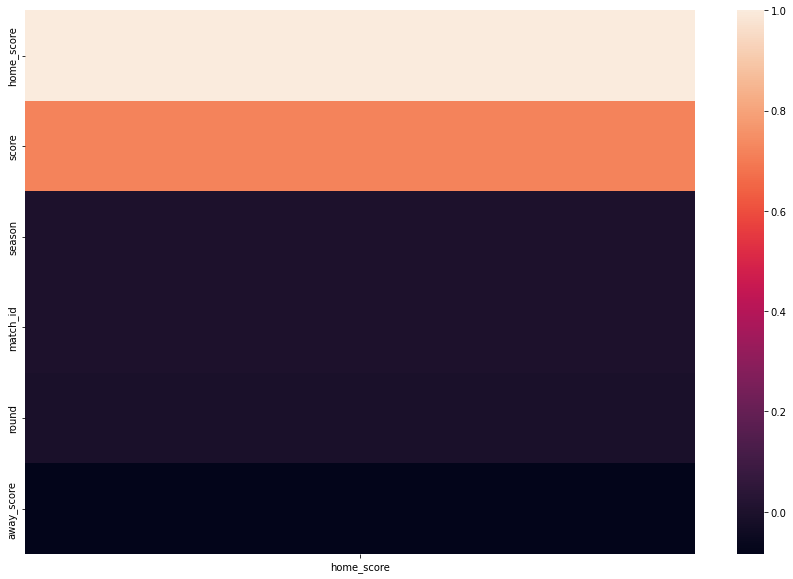

In [152]:

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr()[['home_score']].sort_values(by = 'home_score',ascending=False))

In [137]:
sns.pairplot(df);

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().